In [1]:
#Clustering comparison between K-Means and DBSCAN

#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read .csv dataset file

ds_c=pd.read_csv('clustering.csv')

In [3]:
#get info

ds_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  300 non-null    int64  
 1   A           300 non-null    float64
 2   B           300 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


In [4]:
#check data

ds_c.head()

,Unnamed: 0,A,B
0,0,0.329241,0.841783
1,1,1.697407,-0.236075
2,2,-0.831460,0.584743
3,3,1.825271,-0.297894
4,4,1.236577,0.121528


<AxesSubplot:>

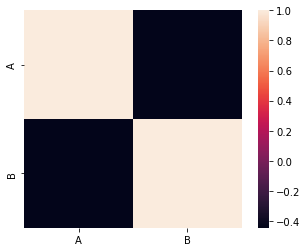

In [5]:
#correlation

ds_new=ds_c.iloc[:,1:3]
cor=ds_new.corr()
sns.heatmap(cor, square=True)

In [6]:
#standard scaler

ss=StandardScaler()
X=ds_new.values
X_scaled=ss.fit_transform(X)
X_scaled

array([[-0.19367631,  1.19707246],
       [ 1.35934632, -0.94233962],
       [-1.51120366,  0.68688054],
       [ 1.50448679, -1.06504283],
       [ 0.83625314, -0.23254316],
       [ 1.71217898, -0.05560362],
       [-0.62854007, -0.04333449],
       [-1.48655212,  0.69062538],
       [ 0.54335099, -1.53549856],
       [-0.1885917 , -1.15412242],
       [-0.57233973,  0.08530069],
       [ 1.70365043, -0.84803885],
       [ 0.42210233, -0.44388723],
       [-1.62947258,  0.38593899],
       [-0.55262164, -0.25998898],
       [-1.50496388,  0.62031921],
       [ 1.10513637, -1.01082203],
       [ 0.38189332, -1.64868256],
       [-0.57425797,  1.48875469],
       [ 1.69212349, -0.13186847],
       [ 0.64464852, -0.2842848 ],
       [-0.17188414, -1.00013217],
       [-0.40308758,  1.37018963],
       [ 0.47195018,  0.6674501 ],
       [-0.04455545,  1.28442231],
       [ 1.00641662, -1.62400292],
       [ 0.41258526,  0.85328116],
       [ 1.00260241, -1.63401717],
       [-1.77578325,

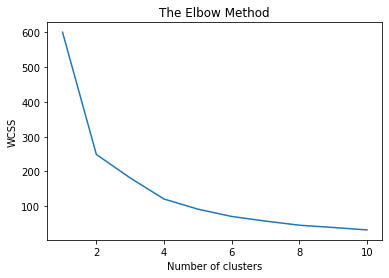

In [7]:
#wcss

wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
#k-means (input the k optimum from the elbow chart above, k=4)

kmeans = KMeans(n_clusters = 4, init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)
y_kmeans

array([1, 3, 2, 3, 3, 3, 2, 2, 0, 0, 2, 3, 0, 2, 2, 2, 3, 0, 1, 3, 3, 0,
       1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 1, 3, 3, 2, 0, 1, 1, 0, 0, 1, 0,
       3, 1, 1, 2, 0, 1, 3, 2, 0, 2, 1, 0, 1, 3, 1, 3, 3, 1, 3, 0, 3, 3,
       3, 2, 3, 3, 3, 0, 2, 0, 1, 1, 2, 3, 1, 3, 0, 2, 1, 2, 0, 0, 1, 3,
       2, 2, 1, 0, 3, 1, 2, 0, 3, 3, 2, 1, 0, 1, 0, 0, 2, 1, 3, 0, 1, 3,
       0, 1, 1, 1, 0, 1, 2, 1, 0, 3, 2, 2, 1, 0, 2, 3, 0, 0, 1, 1, 0, 3,
       3, 0, 1, 0, 1, 0, 0, 0, 1, 3, 0, 1, 3, 0, 0, 3, 1, 3, 1, 0, 3, 1,
       1, 3, 1, 1, 1, 0, 1, 1, 0, 3, 1, 1, 3, 3, 2, 2, 0, 0, 3, 3, 1, 2,
       2, 0, 3, 1, 1, 0, 1, 3, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 1,
       2, 3, 1, 1, 0, 1, 3, 0, 0, 3, 2, 0, 3, 1, 2, 2, 3, 2, 1, 2, 2, 2,
       3, 0, 1, 2, 2, 2, 2, 0, 0, 0, 3, 1, 0, 3, 3, 0, 0, 1, 1, 1, 0, 1,
       3, 1, 2, 3, 0, 3, 0, 2, 3, 2, 2, 2, 3, 2, 3, 2, 1, 3, 2, 2, 3, 1,
       0, 1, 3, 3, 2, 0, 3, 0, 3, 3, 0, 2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2,
       2, 1, 2, 2, 0, 2, 1, 0, 0, 3, 0, 3, 1, 3])

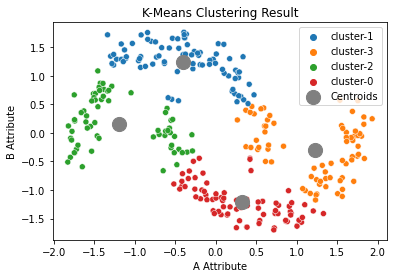

In [9]:
#plot the cluster assignments for k-means

sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue = ["cluster-{}".format(x) for x in y_kmeans])
plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s = 200, c = 'Grey', label = 'Centroids')
plt.title ("K-Means Clustering Result")
plt.xlabel('A Attribute')
plt.ylabel('B Attribute')
plt.legend()
plt.show()

In [10]:
#get the silhoutte score

score = silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
print(score)

0.4329118241119466


In [11]:
#comments and discussions

#Answer: #The silhoutte score is 0.4329, when the k optimum is 4.
         #The evaluation of the quality of clusters created is fairly good (medium).
         #The clusters are not overlapping and not dense/very well separated.

In [12]:
#Part 2 (DBSCAN)

#import additional necessary libraries

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

In [13]:
#dbscan

dbscan = DBSCAN(eps=0.3, min_samples = 3) #randomly pick the velues for eps & min_samples
clusters = dbscan.fit_predict(X_scaled)
clusters

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], d

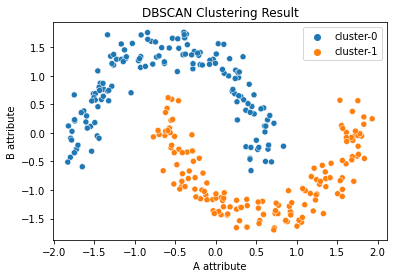

In [14]:
#plot the cluster assignments for dbscan

sns.scatterplot(X_scaled[:, 0], X_scaled[:, 1], hue=["cluster-{}".format(x) for x in clusters])
plt.title('DBSCAN Clustering Result')
plt.xlabel("A attribute")
plt.ylabel("B attribute")
plt.show()

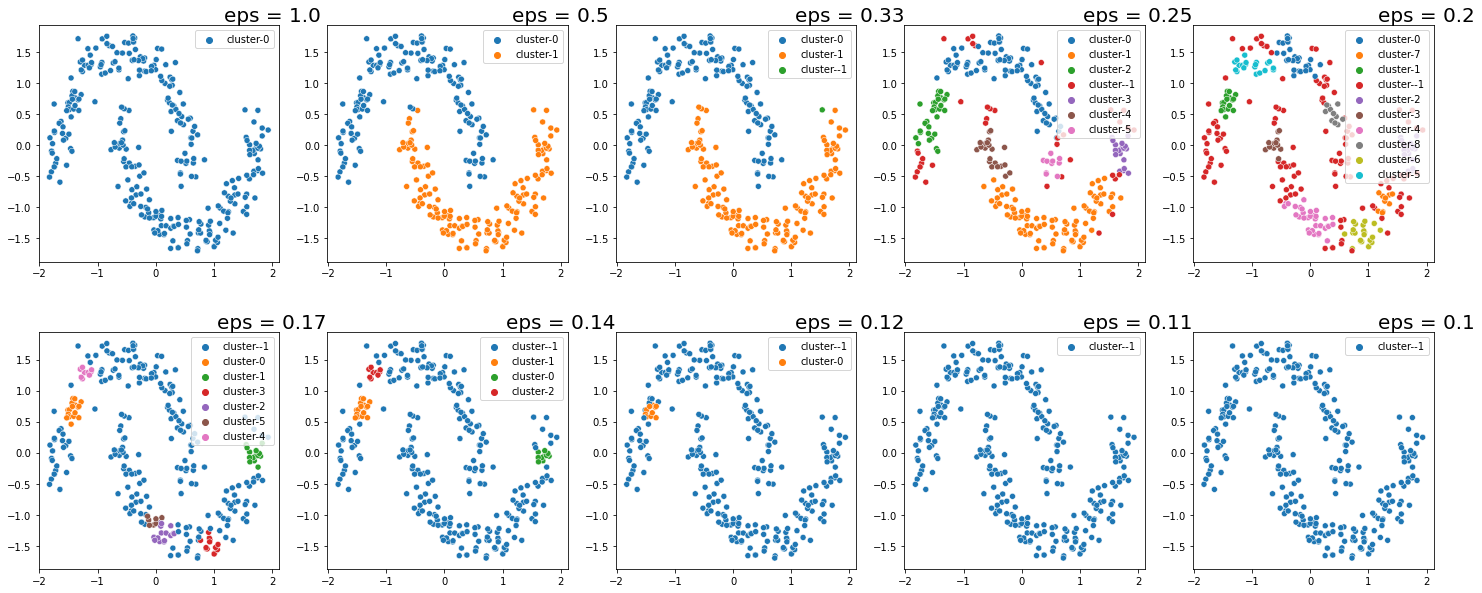

In [15]:
#fine tuning dbscan with varies eps 

fig = plt.figure(figsize=(25, 10))
fig.subplots_adjust(hspace=.3, wspace=.2)
i = 1
for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=10).fit(X_scaled)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    clusters = db.labels_
    
    ax = fig.add_subplot(2, 5, i)
    ax.text(2, 2, "eps = {}".format(round(eps, 2)), fontsize=20,ha="center")
    sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=["cluster-{}".format(x) for x in clusters])
    i+=1

Text(0, 0.5, 'Distance')

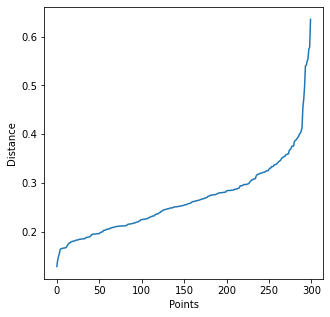

In [16]:
#plot knee locator diagram

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', 
direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.34567786876134754


<Figure size 360x360 with 0 Axes>

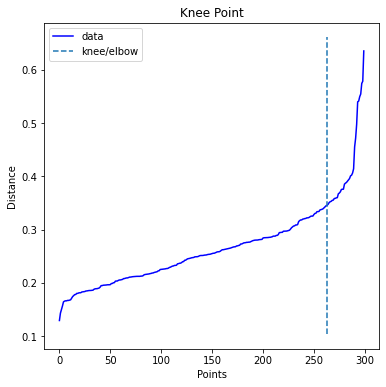

In [17]:
#find the optimum knee

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig("knee.png", dpi=300)
print(distances[knee.knee])

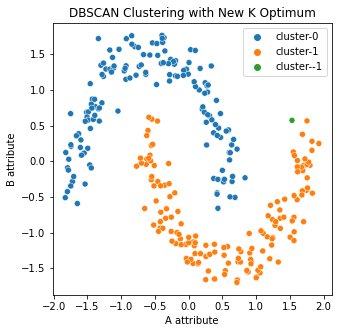

In [18]:
#plot the cluster assignments using eps = k optimum = knee point = 0.345677

db = DBSCAN(eps=distances[knee.knee], 
min_samples=10).fit(X_scaled)
labels = db.labels_

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=["cluster-{}".format(x) for x in labels])
plt.title("DBSCAN Clustering with New K Optimum")
plt.xlabel("A attribute")
plt.ylabel("B attribute")
plt.show()

In [19]:
#comments and discussions

#Answer: #First, for DBSCAN, the epsilon value/radius and the minimum samples are selected randomly.
         #Then, the fine tuning of the DBSCAN method was carried out.
         #Varies epsilon values ranging from 0.1 to 1 were carried out.
         #Next, the knee locator diagram was plotted to find the k optimum which is 0.345677.
         #Finally, the DBSCAN was performed again using the new K optimum and plotted the diagram.
         #There are 3 clusters.
         #The green cluster is the outlier data.

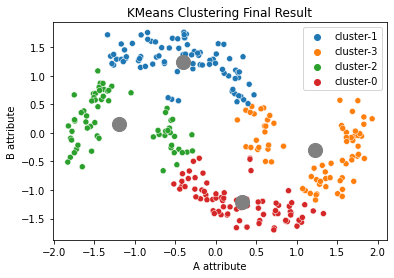

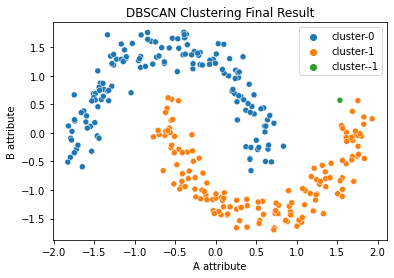

In [20]:
#Part 3 (K-Means vs DBSCAN)

sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue = ["cluster-{}".format(x) for x in y_kmeans])
plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s = 200, c = 'Grey', label = 'Centroids')

plt.title ("KMeans Clustering Final Result")
plt.xlabel("A attribute")
plt.ylabel("B attribute")
plt.show()

sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=["cluster-{}".format(x) for x in labels])
plt.title("DBSCAN Clustering Final Result")
plt.xlabel("A attribute")
plt.ylabel("B attribute")
plt.show()

In [21]:
#comments and discussions

#Answer: #DBSCAN is the better clustering technique for this dataset.
         #K-Means identified the data has 4 clusters while DBSCAN identified the data has 3 clusters.
         #DBSCAN can be used to identify the clusters in arbitiary shape.
         #The number of cluster is not an input parameter.
         #It is suitable to show dense population data.